# 결측값 처리

https://rfriend.tistory.com/262


In [1]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(5,3), columns=['C1','C2','C3'])

In [2]:
df.iloc[0,0] = None
df.iloc[1,[0,2]] = None
df.iloc[2,1] = None
df.iloc[3,1] = None
df.iloc[4,2] = None

In [3]:
df

,C1,C2,C3
0,NaN,-1.255159,-0.597334
1,NaN,-2.198232,NaN
2,-0.236386,NaN,0.097061
3,0.854081,NaN,0.832855
4,0.332004,-0.633649,NaN


In [8]:
df.fillna(0)
# 결측값을 특정 값으로 채우기

,C1,C2,C3
0,0.000000,0.000714,0.179260
1,0.000000,0.593398,0.000000
2,0.857988,0.000000,0.308244
3,-1.403057,0.000000,-1.305287
4,1.318025,-0.866961,0.000000


In [12]:
df.fillna(method='ffill')

# df.fillna(method='bfill') # 뒤로 채우기
#결측값을 앞 방향 혹은 뒷 방향으로 채우기

,C1,C2,C3
0,NaN,0.000714,0.179260
1,NaN,0.593398,0.179260
2,0.857988,0.593398,0.308244
3,-1.403057,0.593398,-1.305287
4,1.318025,-0.866961,-1.305287


In [14]:
df.fillna(method='ffill', limit=1)

# 앞/뒤 방향으로 결측값 채우는 회수를 제한하기

,C1,C2,C3
0,NaN,0.000714,0.179260
1,NaN,0.593398,0.179260
2,0.857988,0.593398,0.308244
3,-1.403057,NaN,-1.305287
4,1.318025,-0.866961,-1.305287


In [15]:
df.fillna(df.mean())
# 결측값을 변수별 평균으로 대체하기

,C1,C2,C3
0,0.257652,0.000714,0.179260
1,0.257652,0.593398,-0.272594
2,0.857988,-0.090950,0.308244
3,-1.403057,-0.090950,-1.305287
4,1.318025,-0.866961,-0.272594


In [16]:
df.where(pd.notnull(df), df.mean(), axis='columns')
# 결측값을 변수별 평균으로 대체하기
# series.where(Series객체에 대한 조건문, 거짓 값에 대한 대체 값)

,C1,C2,C3
0,0.257652,0.000714,0.179260
1,0.257652,0.593398,-0.272594
2,0.857988,-0.090950,0.308244
3,-1.403057,-0.090950,-1.305287
4,1.318025,-0.866961,-0.272594


In [6]:
df_2 = pd.DataFrame({'C1': [1, 2, 3, 4, 5], 'C2': [6, 7, 8, 9, 10]})
df_2.iloc[[1,3],1] = np.nan
df_2

,C1,C2
0,1,6.0
1,2,NaN
2,3,8.0
3,4,NaN
4,5,10.0


In [27]:
df_2['C2_New'] = np.where(pd.notnull(df_2['C2']) == True, df_2['C2'], df_2['C1']) # np.where(조건, 참일 때 값, 거짓일 때 값)
df_2
# 결측값을 다른 변수의 값으로 대체하기

,C1,C2,C2_New
0,1,6.0,6.0
1,2,NaN,2.0
2,3,8.0,8.0
3,4,NaN,4.0
4,5,10.0,10.0


---
## 모형을 사용한 결측값 대치

![](image/%EA%B2%B0%EC%B8%A1%EA%B0%92.png)

https://wikidocs.net/125444
## Imputation using KNN

* KNN을 활용한 결측값 대치도 가능하다.

In [7]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
import warnings 
warnings.filterwarnings('ignore')

In [8]:
df = pd.DataFrame(load_boston().data, columns = load_boston().feature_names)
df['TARGET'] = load_boston().target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [9]:
i1 = np.random.choice(a=df.index, size=35)
i2 = np.random.choice(a=df.index, size=20)
df.loc[i1, 'INDUS'] = np.nan
df.loc[i2, 'TAX'] = np.nan
df.info()
# 랜덤으로 결측값 만들기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    472 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      486 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [32]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df)
df_imputed = pd.DataFrame(imputed, columns=df.columns)
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  TARGET   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


# 이상치 처리

### IQR method

사분위범위수 IQR(Interquartile range)를 사용하여 이상치를 찾을 수 있다.

IQR = Q3 ​− Q1

​IQR은 제 3사분위수에서 제 1사분위수를 뺀 값이다. 즉 데이터의 중간 50%의 범위이다.

Q1​−1.5∗IQR보다 왼쪽에 있거나, Q_3 + 1.5*IQRQ3​+1.5∗IQR 보다 오른쪽에 있는 경우 우리는 이상치라고 판단한다.

In [10]:
import numpy as np

data = np.random.randn(100)

data = np.concatenate((data, np.array([8,10,-3,-5])))

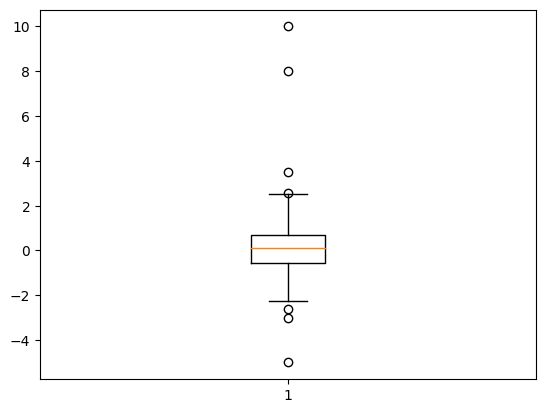

In [11]:
import matplotlib.pyplot as plt
plt.figure()
plt.boxplot(data)
plt.show()

In [12]:
Q3, Q1 = np.percentile(data, [75, 25])
IQR = Q3 - Q1
IQR

1.247048185892345

In [13]:
data[(Q1-1.5*IQR > data) | (Q3+1.5*IQR < data)]
# 이상치

array([ 3.48598977,  2.58629516, -2.59542175,  8.        , 10.        ,
       -3.        , -5.        ])

In [14]:
# 이상치를 제거할 수 있는 함수
def remove_out(dataframe, remove_col):
    dff = dataframe
    for k in remove_col:
        level_1q = dff[k].quantile(0.25)
        level_3q = dff[k].quantile(0.75)
        IQR = level_3q - level_1q
        rev_range = 1.5  # 제거 범위 조절 변수, 3을 적용할 수도 있음 데이터에 따라 다르게 적용해야 함.(1.5는 2.698시그마와 동일)
        dff = dff[(dff[k] <= level_3q + (rev_range * IQR)) | (dff[k] >= level_1q - (rev_range * IQR))]
        dff = dff.reset_index(drop=True)
    return dff